In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender_sub = pd.read_csv("gender_submission.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#cleaning the data to make it uniform
#We are using a function so that we can replicate this onto multiple different dataframes so they are uniform
cag = ['Pclass','Sex', 'Embarked','Parch','SibSp'] 
nub = ["SibSp", 'Parch', 'Fare', 'Age'] 

def clean(data):
    new_data = data.drop(["Ticket", 'Cabin', 'Name', 'PassengerId'], axis =1)
    for col in nub:
        new_data[col].fillna(data[col].median(), inplace= True)
        new_data.Embarked.fillna('U', inplace=True)
    return new_data

data = clean(data)
train = clean(test)
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [4]:
data.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,4
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,NaN,29.361582,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.019697,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,22.000000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,35.000000,1.000000,0.000000,31.000000,NaN


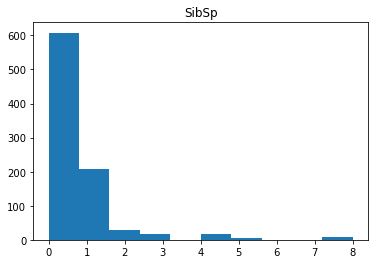

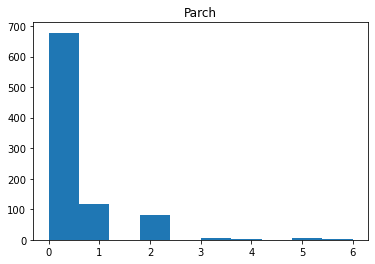

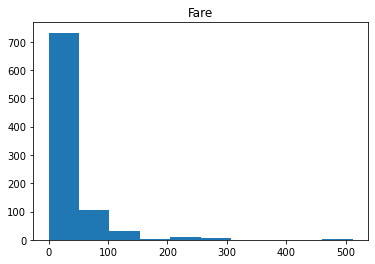

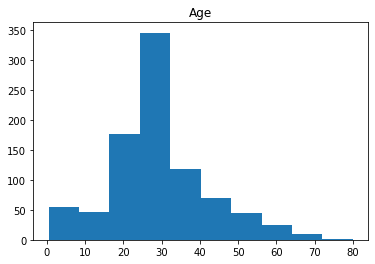

In [5]:
for name in nub:
    plt.hist(data[name])
    plt.title(name)
    plt.show()

          SibSp     Parch      Fare       Age
SibSp  1.000000  0.414838  0.159651 -0.233296
Parch  0.414838  1.000000  0.216225 -0.172482
Fare   0.159651  0.216225  1.000000  0.096688
Age   -0.233296 -0.172482  0.096688  1.000000


<AxesSubplot:>

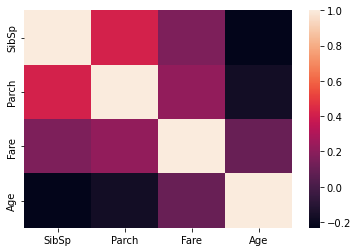

In [6]:
print(data[nub].corr())
sns.heatmap(data[nub].corr())

In [7]:
pd.pivot_table(data, index='Survived', values = nub)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.028233,22.117887,0.329690,0.553734
1,28.291433,48.395408,0.464912,0.473684


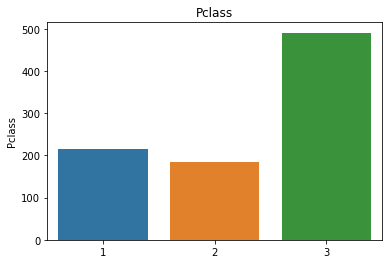

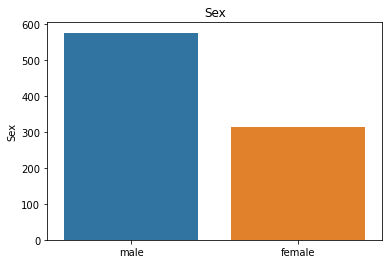

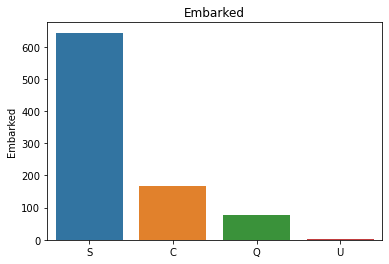

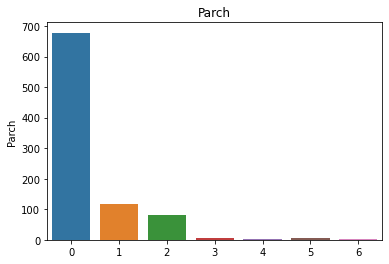

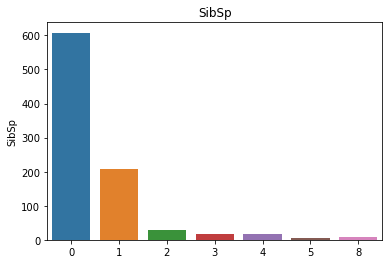

In [8]:
for i in cag:
    sns.barplot(x= data[i].value_counts().index, y = data[i].value_counts()).set_title(i)
    plt.show()

In [9]:
for i in ["Pclass", 'Sex', 'Embarked']:
    print(pd.pivot_table(train, index='Survived', columns=i, values = 'SibSp', aggfunc='count'))
    print('--------------------------------------------------------')


KeyError: 'Survived'

In [18]:
all_data = pd.get_dummies(data[cag])
all_data

,Pclass,Parch,SibSp,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,3,0,1,0,1,0,0,1,0
1,1,0,1,1,0,1,0,0,0
2,3,0,0,1,0,0,0,1,0
3,1,0,1,1,0,0,0,1,0
4,3,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,0,0,1,0
887,1,0,0,1,0,0,0,1,0
888,3,2,1,1,0,0,0,1,0
889,1,0,0,0,1,1,0,0,0


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y= all_data['Survived']
X = all_data.drop(columns=['Survived'], axis=1)

KeyError: 'Survived'

In [13]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)

ValueError: could not convert string to float: 'male'